In [ ]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.integrate import cumulative_trapezoid

In [ ]:
# initializing parameters
L = 1.5 * 10**(-3) # H
C = 0.22 * 10**(-6) # F
R1 = 100 # Ohm
R2 = 1000 # Ohm
Ugen = 0.8 # V
freqs = np.logspace(1, 5, 30)
np.savetxt('1.csv',freqs)

In [ ]:
# importing data
task1_100Ohm_03kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_0.3kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_05kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_0.5kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_07kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_0.7kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_1kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_1kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_2kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_2kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_5kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_5kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_8_761kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_8.761kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_20kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_20kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_40kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_40kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_50kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_50kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_60kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_60kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_80kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_80kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_100Ohm_100kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_100Ohm_100kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)

task1_1kOhm_01kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_0.1kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_04kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_0.4kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_07kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_0.7kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_1kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_1kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_3kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_3kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_6kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_6kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_8_761kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_8.761kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_20kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_20kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_40kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_40kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_60kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_60kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_80kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_80kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task1_1kOhm_100kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task1_1kOhm_100kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)

task3_100Ohm_05kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_0.5kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_2kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_2kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_5kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_5kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_7kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_7kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_7_5kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_7.5kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_8_5kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_8.5kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_9kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_9kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_9_5kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_9.5kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_10kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_10kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_15kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_15kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_20kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_20kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_50kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_50kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)
task3_100Ohm_70kHz = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/4dae070c4c4a50fa91eaf3605279dcf8da26eaa2/task3_100Ohm_70kHz.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0)

In [ ]:
task1_100Ohm_data = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E12He/E12%20-%20Task%201%20-%20R1.csv', delimiter = ',', decimal = '.')

# Task 1

In [ ]:
# creating arrays for R1
task1_100Ohm_03kHz_time = np.array(task1_100Ohm_03kHz['Time']).astype(float) # micros
task1_100Ohm_03kHz_U0 = np.array(task1_100Ohm_03kHz['Channel B']).astype(float) # V
task1_100Ohm_03kHz_UR = np.array(task1_100Ohm_03kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_05kHz_time = np.array(task1_100Ohm_05kHz['Time']).astype(float) # micros
task1_100Ohm_05kHz_U0 = np.array(task1_100Ohm_05kHz['Channel B']).astype(float) # V
task1_100Ohm_05kHz_UR = np.array(task1_100Ohm_05kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_07kHz_time = np.array(task1_100Ohm_07kHz['Time']).astype(float) # micros
task1_100Ohm_07kHz_U0 = np.array(task1_100Ohm_07kHz['Channel B']).astype(float) # V
task1_100Ohm_07kHz_UR = np.array(task1_100Ohm_07kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_1kHz_time = np.array(task1_100Ohm_1kHz['Time']).astype(float) # micros
task1_100Ohm_1kHz_U0 = np.array(task1_100Ohm_1kHz['Channel B']).astype(float) # V
task1_100Ohm_1kHz_UR = np.array(task1_100Ohm_1kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_2kHz_time = np.array(task1_100Ohm_2kHz['Time']).astype(float) # micros
task1_100Ohm_2kHz_U0 = np.array(task1_100Ohm_2kHz['Channel B']).astype(float) # V
task1_100Ohm_2kHz_UR = np.array(task1_100Ohm_2kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_5kHz_time = np.array(task1_100Ohm_5kHz['Time']).astype(float) # micros
task1_100Ohm_5kHz_U0 = np.array(task1_100Ohm_5kHz['Channel B']).astype(float) # V
task1_100Ohm_5kHz_UR = np.array(task1_100Ohm_5kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_8_761kHz_time = np.array(task1_100Ohm_8_761kHz['Time']).astype(float) # micros
task1_100Ohm_8_761kHz_U0 = np.array(task1_100Ohm_8_761kHz['Channel B']).astype(float) # V
task1_100Ohm_8_761kHz_UR = np.array(task1_100Ohm_8_761kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_20kHz_time = np.array(task1_100Ohm_20kHz['Time']).astype(float) # micros
task1_100Ohm_20kHz_U0 = np.array(task1_100Ohm_20kHz['Channel B']).astype(float) # V
task1_100Ohm_20kHz_UR = np.array(task1_100Ohm_20kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_40kHz_time = np.array(task1_100Ohm_40kHz['Time']).astype(float) # micros
task1_100Ohm_40kHz_U0 = np.array(task1_100Ohm_40kHz['Channel B']).astype(float) # V
task1_100Ohm_40kHz_UR = np.array(task1_100Ohm_40kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_50kHz_time = np.array(task1_100Ohm_50kHz['Time']).astype(float) # micros
task1_100Ohm_50kHz_U0 = np.array(task1_100Ohm_50kHz['Channel B']).astype(float) # V
task1_100Ohm_50kHz_UR = np.array(task1_100Ohm_50kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_60kHz_time = np.array(task1_100Ohm_60kHz['Time']).astype(float) # micros
task1_100Ohm_60kHz_U0 = np.array(task1_100Ohm_60kHz['Channel B']).astype(float) # V
task1_100Ohm_60kHz_UR = np.array(task1_100Ohm_60kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_80kHz_time = np.array(task1_100Ohm_80kHz['Time']).astype(float) # micros
task1_100Ohm_80kHz_U0 = np.array(task1_100Ohm_80kHz['Channel B']).astype(float) # V
task1_100Ohm_80kHz_UR = np.array(task1_100Ohm_80kHz['Channel A']).astype(float) * 10**(-3) # V

task1_100Ohm_100kHz_time = np.array(task1_100Ohm_100kHz['Time']).astype(float) # micros
task1_100Ohm_100kHz_U0 = np.array(task1_100Ohm_100kHz['Channel B']).astype(float) # V
task1_100Ohm_100kHz_UR = np.array(task1_100Ohm_100kHz['Channel A']).astype(float) * 10**(-3) # V

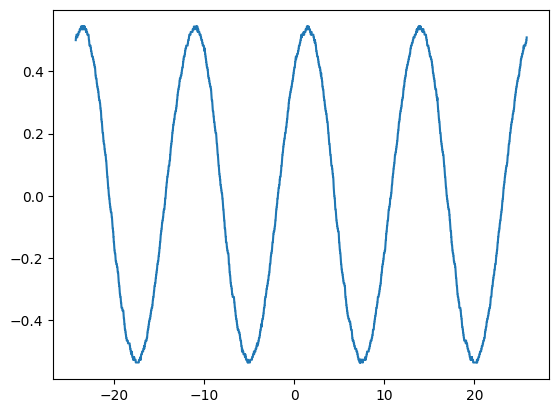

In [ ]:
plt.plot(task1_100Ohm_80kHz_time, task1_100Ohm_80kHz_U0)

In [ ]:
# amplitudes of U_R for R1
task1_100Ohm_UR_amps = np.zeros(13)
task1_100Ohm_UR_amps[0] = np.max(task1_100Ohm_03kHz_UR)
task1_100Ohm_UR_amps[1] = np.max(task1_100Ohm_05kHz_UR)
task1_100Ohm_UR_amps[2] = np.max(task1_100Ohm_07kHz_UR)
task1_100Ohm_UR_amps[3] = np.max(task1_100Ohm_1kHz_UR)
task1_100Ohm_UR_amps[4] = np.max(task1_100Ohm_2kHz_UR)
task1_100Ohm_UR_amps[5] = np.max(task1_100Ohm_5kHz_UR)
task1_100Ohm_UR_amps[6] = np.max(task1_100Ohm_8_761kHz_UR)
task1_100Ohm_UR_amps[7] = np.max(task1_100Ohm_20kHz_UR)
task1_100Ohm_UR_amps[8] = np.max(task1_100Ohm_40kHz_UR)
task1_100Ohm_UR_amps[9] = np.max(task1_100Ohm_50kHz_UR)
task1_100Ohm_UR_amps[10] = np.max(task1_100Ohm_60kHz_UR)
task1_100Ohm_UR_amps[11] = np.max(task1_100Ohm_80kHz_UR)
task1_100Ohm_UR_amps[12] = np.max(task1_100Ohm_100kHz_UR)
task1_100Ohm_UR_res = task1_100Ohm_UR_amps[6]
task1_100Ohm_UR_per_UR_res = task1_100Ohm_UR_amps/task1_100Ohm_UR_res
task1_100Ohm_UR_per_UR_res

array([0.27292287, 0.41518062, 0.54159517, 0.68385292, 0.8893732 ,
       1.        , 1.        , 0.98421161, 0.87352992, 0.81032264,
       0.74711546, 0.65227687, 0.55743837])

In [ ]:
# frequencies for R1
task1_100Ohm_freq = np.array([0.3,0.5,0.7,1,2,5,8.761,20,40,50,60,80,100]) * 1000

In [ ]:
# amplitudes of U_0 for R1
task1_100Ohm_U0_amps = np.zeros(13)
task1_100Ohm_U0_amps[0] = np.max(task1_100Ohm_03kHz_U0)
task1_100Ohm_U0_amps[1] = np.max(task1_100Ohm_05kHz_U0)
task1_100Ohm_U0_amps[2] = np.max(task1_100Ohm_07kHz_U0)
task1_100Ohm_U0_amps[3] = np.max(task1_100Ohm_1kHz_U0)
task1_100Ohm_U0_amps[4] = np.max(task1_100Ohm_2kHz_U0)
task1_100Ohm_U0_amps[5] = np.max(task1_100Ohm_5kHz_U0)
task1_100Ohm_U0_amps[6] = np.max(task1_100Ohm_8_761kHz_U0)
task1_100Ohm_U0_amps[7] = np.max(task1_100Ohm_20kHz_U0)
task1_100Ohm_U0_amps[8] = np.max(task1_100Ohm_40kHz_U0)
task1_100Ohm_U0_amps[9] = np.max(task1_100Ohm_50kHz_U0)
task1_100Ohm_U0_amps[10] = np.max(task1_100Ohm_60kHz_U0)
task1_100Ohm_U0_amps[11] = np.max(task1_100Ohm_80kHz_U0)
task1_100Ohm_U0_amps[12] = np.max(task1_100Ohm_100kHz_U0)
task1_100Ohm_U0_res = task1_100Ohm_U0_amps[6]
task1_100Ohm_U0_per_U0_res = task1_100Ohm_U0_amps/task1_100Ohm_U0_res
task1_100Ohm_U0_per_U0_res

array([5.81556253, 5.54796692, 5.07990656, 4.54471534, 3.00650393,
       1.40116089, 1.        , 1.66875726, 2.93960445, 3.3407661 ,
       3.67526042, 4.14355369, 4.34401768])

In [ ]:
# creating arrays for R2
task1_1kOhm_01kHz_time = np.array(task1_1kOhm_01kHz['Time']).astype(float) # micros
task1_1kOhm_01kHz_U0 = np.array(task1_1kOhm_01kHz['Channel B']).astype(float) # V
task1_1kOhm_01kHz_UR = np.array(task1_1kOhm_01kHz['Channel A']).astype(float) # V

task1_1kOhm_04kHz_time = np.array(task1_1kOhm_04kHz['Time']).astype(float) # micros
task1_1kOhm_04kHz_U0 = np.array(task1_1kOhm_04kHz['Channel B']).astype(float) # V
task1_1kOhm_04kHz_UR = np.array(task1_1kOhm_04kHz['Channel A']).astype(float) # V

task1_1kOhm_07kHz_time = np.array(task1_1kOhm_07kHz['Time']).astype(float) # micros
task1_1kOhm_07kHz_U0 = np.array(task1_1kOhm_07kHz['Channel B']).astype(float) # V
task1_1kOhm_07kHz_UR = np.array(task1_1kOhm_07kHz['Channel A']).astype(float) # V

task1_1kOhm_1kHz_time = np.array(task1_1kOhm_1kHz['Time']).astype(float) # micros
task1_1kOhm_1kHz_U0 = np.array(task1_1kOhm_1kHz['Channel B']).astype(float) # V
task1_1kOhm_1kHz_UR = np.array(task1_1kOhm_1kHz['Channel A']).astype(float) # V

task1_1kOhm_3kHz_time = np.array(task1_1kOhm_3kHz['Time']).astype(float) # micros
task1_1kOhm_3kHz_U0 = np.array(task1_1kOhm_3kHz['Channel B']).astype(float) # V
task1_1kOhm_3kHz_UR = np.array(task1_1kOhm_3kHz['Channel A']).astype(float) # V

task1_1kOhm_6kHz_time = np.array(task1_1kOhm_6kHz['Time']).astype(float) # micros
task1_1kOhm_6kHz_U0 = np.array(task1_1kOhm_6kHz['Channel B']).astype(float) # V
task1_1kOhm_6kHz_UR = np.array(task1_1kOhm_6kHz['Channel A']).astype(float) # V

task1_1kOhm_8_761kHz_time = np.array(task1_1kOhm_8_761kHz['Time']).astype(float) # micros
task1_1kOhm_8_761kHz_U0 = np.array(task1_1kOhm_8_761kHz['Channel B']).astype(float) # V
task1_1kOhm_8_761kHz_UR = np.array(task1_1kOhm_8_761kHz['Channel A']).astype(float) # V

task1_1kOhm_20kHz_time = np.array(task1_1kOhm_20kHz['Time']).astype(float) # micros
task1_1kOhm_20kHz_U0 = np.array(task1_1kOhm_20kHz['Channel B']).astype(float) # V
task1_1kOhm_20kHz_UR = np.array(task1_1kOhm_20kHz['Channel A']).astype(float) # V

task1_1kOhm_40kHz_time = np.array(task1_1kOhm_40kHz['Time']).astype(float) # micros
task1_1kOhm_40kHz_U0 = np.array(task1_1kOhm_40kHz['Channel B']).astype(float) # V
task1_1kOhm_40kHz_UR = np.array(task1_1kOhm_40kHz['Channel A']).astype(float) # V

task1_1kOhm_60kHz_time = np.array(task1_1kOhm_60kHz['Time']).astype(float) # micros
task1_1kOhm_60kHz_U0 = np.array(task1_1kOhm_60kHz['Channel B']).astype(float) # V
task1_1kOhm_60kHz_UR = np.array(task1_1kOhm_60kHz['Channel A']).astype(float) # V

task1_1kOhm_80kHz_time = np.array(task1_1kOhm_80kHz['Time']).astype(float) # micros
task1_1kOhm_80kHz_U0 = np.array(task1_1kOhm_80kHz['Channel B']).astype(float) # V
task1_1kOhm_80kHz_UR = np.array(task1_1kOhm_80kHz['Channel A']).astype(float) # V

task1_1kOhm_100kHz_time = np.array(task1_1kOhm_100kHz['Time']).astype(float) # micros
task1_1kOhm_100kHz_U0 = np.array(task1_1kOhm_100kHz['Channel A']).astype(float) # V
task1_1kOhm_100kHz_UR = np.array(task1_1kOhm_100kHz['Channel B']).astype(float) # V

In [ ]:
# amplitudes of U_R for R2
task1_1kOhm_UR_amps = np.zeros(11)
task1_1kOhm_UR_amps[0] = np.max(task1_1kOhm_01kHz_UR)
task1_1kOhm_UR_amps[1] = np.max(task1_1kOhm_04kHz_UR)
task1_1kOhm_UR_amps[2] = np.max(task1_1kOhm_07kHz_UR)
task1_1kOhm_UR_amps[3] = np.max(task1_1kOhm_1kHz_UR)
task1_1kOhm_UR_amps[4] = np.max(task1_1kOhm_3kHz_UR)
task1_1kOhm_UR_amps[5] = np.max(task1_1kOhm_6kHz_UR)
task1_1kOhm_UR_amps[6] = np.max(task1_1kOhm_8_761kHz_UR)
task1_1kOhm_UR_amps[7] = np.max(task1_1kOhm_20kHz_UR)
task1_1kOhm_UR_amps[8] = np.max(task1_1kOhm_40kHz_UR)
task1_1kOhm_UR_amps[9] = np.max(task1_1kOhm_60kHz_UR)
task1_1kOhm_UR_amps[10] = np.max(task1_1kOhm_80kHz_UR)
#task1_1kOhm_UR_amps[11] = np.max(task1_1kOhm_100kHz_UR)
task1_1kOhm_UR_res = task1_1kOhm_UR_amps[6]
task1_1kOhm_UR_per_UR_res = task1_1kOhm_UR_amps/task1_1kOhm_UR_res
task1_1kOhm_UR_amps

array([0.1004669, 0.3099155, 0.3971679, 0.4408093, 0.4844508, 0.4931791,
       0.4931791, 0.4844508, 0.4757225, 0.4495376, 0.4233528])

In [ ]:
# amplitudes of U_0 for R2
task1_1kOhm_U0_amps = np.zeros(11)
task1_1kOhm_U0_amps[0] = np.max(task1_1kOhm_01kHz_U0)
task1_1kOhm_U0_amps[1] = np.max(task1_1kOhm_04kHz_U0)
task1_1kOhm_U0_amps[2] = np.max(task1_1kOhm_07kHz_U0)
task1_1kOhm_U0_amps[3] = np.max(task1_1kOhm_1kHz_U0)
task1_1kOhm_U0_amps[4] = np.max(task1_1kOhm_3kHz_U0)
task1_1kOhm_U0_amps[5] = np.max(task1_1kOhm_6kHz_U0)
task1_1kOhm_U0_amps[6] = np.max(task1_1kOhm_8_761kHz_U0)
task1_1kOhm_U0_amps[7] = np.max(task1_1kOhm_20kHz_U0)
task1_1kOhm_U0_amps[8] = np.max(task1_1kOhm_40kHz_U0)
task1_1kOhm_U0_amps[9] = np.max(task1_1kOhm_60kHz_U0)
task1_1kOhm_U0_amps[10] = np.max(task1_1kOhm_80kHz_U0)
#task1_1kOhm_U0_amps[11] = np.max(task1_1kOhm_100kHz_U0)
task1_1kOhm_U0_res = task1_1kOhm_U0_amps[6]
task1_1kOhm_U0_per_U0_res = task1_1kOhm_U0_amps/task1_1kOhm_U0_res
task1_1kOhm_U0_amps

array([0.7904294, 0.6937773, 0.6234626, 0.5707266, 0.5092319, 0.5004425,
       0.5004425, 0.5092319, 0.5180212, 0.5443892, 0.5531785])

In [ ]:
# frequencies for R2
task1_1kOhm_freq = np.array([0.1, 0.4, 0.7, 1, 3, 6, 8.761, 20, 40, 60, 80]) * 1000

In [ ]:
task1_100Ohm_freq_new = task1_100Ohm_data['Frequency (Hz)']
task1_100Ohm_U0_amps_new = task1_100Ohm_data['U0 (mV)'] * 10**(-3)
task1_100Ohm_UR_amps_new = task1_100Ohm_data['UR (mV)'] * 10**(-3)

In [ ]:
task1_100Ohm_UR_res_new = np.max(task1_100Ohm_UR_amps_new)
task1_100Ohm_UR_per_UR_res_new = task1_100Ohm_UR_amps_new/task1_100Ohm_UR_res_new

In [ ]:
def task1_fit(f, R, l, c):
  return R / np.sqrt(R**2 + (2*np.pi * f * l - 1 / (2*np.pi * f * c))**2)

In [ ]:
# fit for R1
popt1, pcov1 = curve_fit(task1_fit, task1_100Ohm_freq, task1_100Ohm_UR_per_UR_res, p0 = [100, L, C])

# fit for R2
popt2, pcov2 = curve_fit(task1_fit, task1_1kOhm_freq, task1_1kOhm_UR_per_UR_res, p0 = [1000, L, C])

# frequencies
freq_smooth = np.linspace(10,100000,100000)

In [ ]:
popt1

array([ 2.58181456e+02, -5.85076301e-04,  5.83336018e-07])

In [ ]:
popt2

array([9.55520383e+02, 1.15035559e-03, 3.31816075e-07])

In [ ]:
# extra resistance
r1 = popt1[0] - R1
r2 = popt2[0] - R2
r1, r2

(158.18145626369045, -44.479617306189425)

In [ ]:
freq_smooth_long = np.linspace(1, 200000, 100000)

In [ ]:
fit1 = task1_fit(freq_smooth_long, popt1[0], popt1[1], popt1[2])
fit2 = task1_fit(freq_smooth_long, popt2[0], popt2[1], popt2[2])

In [ ]:
# resonance frequency and damping constant from resonance curve for R1
fit1_max = np.max(fit1)
f1_R1_c, f2_R1_c = 0, 0
for i in range(0, len(freq_smooth_long)):
  if fit1[i] >= 1/np.sqrt(2):
    f1_R1_c = freq_smooth_long[i]
    break
for i in range(len(freq_smooth_long)-1, 0, -1):
  if fit1[i] >= 1/np.sqrt(2):
    f2_R1_c = freq_smooth_long[i]
    break

delta_f_R1_c = f2_R1_c - f1_R1_c # delta f
f_res_index_R1_c = np.argmax(fit1)
f_res_R1_c = freq_smooth_long[f_res_index_R1_c] # resonance frequency from fit
delta1_c = np.pi * delta_f_R1_c # damping constant
f_res_R1_c, delta1_c, f1_R1_c, f2_R1_c, delta_f_R1_c

(8615.043070430704,
 213886.9804819499,
 1075.0053700537005,
 69157.34578345783,
 68082.34041340413)

In [ ]:
# resonance frequency and damping constant from resonance curve for R2
fit2_max = np.max(fit2)
f1_R2_c, f2_R2_c = 0, 0
for i in range(0, len(freq_smooth_long)):
  if fit2[i] >= 1/np.sqrt(2):
    f1_R2_c = freq_smooth_long[i]
    break
for i in range(len(freq_smooth_long)-1, 0, -1):
  if fit2[i] >= 1/np.sqrt(2):
    f2_R2_c = freq_smooth_long[i]
    break

delta_f_R2_c = f2_R2_c - f1_R2_c # delta f
f_res_index_R2_c = np.argmax(fit1)
f_res_R2_c = freq_smooth_long[f_res_index_R2_c] # resonance frequency from fit
delta2_c = np.pi * delta_f_R2_c # damping constant
f_res_R2_c, delta2_c, f1_R2_c, f2_R2_c, delta_f_R2_c

(8761.043800438005,
 415308.058984634,
 501.00250002500024,
 132697.66348663488,
 132196.66098660987)

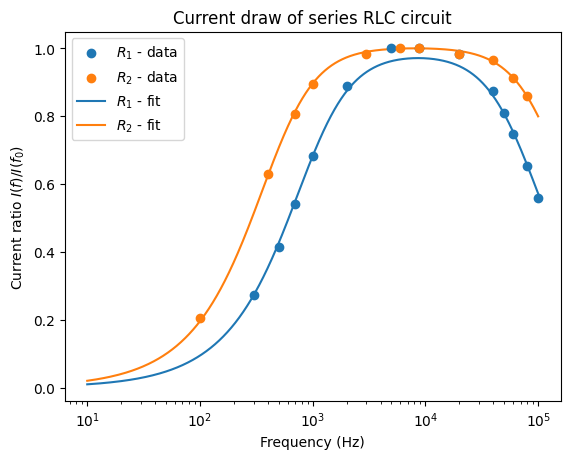

In [ ]:
plt.scatter(task1_100Ohm_freq, task1_100Ohm_UR_per_UR_res, label = '$R_1$ - data', zorder = +5)
plt.scatter(task1_1kOhm_freq, task1_1kOhm_UR_per_UR_res, label = '$R_2$ - data', zorder = +10)
plt.plot(freq_smooth, task1_fit(freq_smooth, popt1[0], popt1[1], popt1[2]), label = '$R_1$ - fit')
plt.plot(freq_smooth, task1_fit(freq_smooth, popt2[0], popt2[1], popt2[2]), label = '$R_2$ - fit')
plt.ylabel('Current ratio $I(f)/I(f_0)$')
plt.xlabel('Frequency (Hz)')
plt.title('Current draw of series RLC circuit')
plt.xscale('log')
plt.legend()
plt.savefig('Task 1 - plot 1')

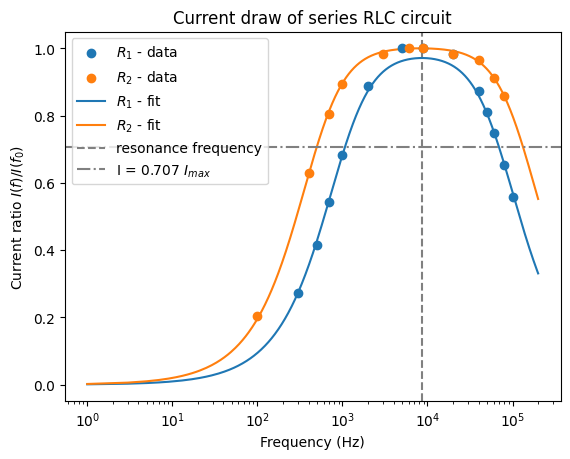

In [ ]:
plt.scatter(task1_100Ohm_freq, task1_100Ohm_UR_per_UR_res, label = '$R_1$ - data', zorder = +5)
plt.scatter(task1_1kOhm_freq, task1_1kOhm_UR_per_UR_res, label = '$R_2$ - data', zorder = +10)
plt.plot(freq_smooth_long, fit1, label = '$R_1$ - fit')
plt.plot(freq_smooth_long, fit2, label = '$R_2$ - fit')
#plt.plot(freq_smooth, task1_fit(freq_smooth, R1, L, C), label = 'should look like this')
plt.axvline(x = 8615.043070430704, ls = '--', c = 'gray', zorder = -10, label = 'resonance frequency')
plt.axhline(1/np.sqrt(2), ls = 'dashdot', label = 'I = 0.707 $I_{max}$', color = 'gray')
plt.xscale('log')
plt.ylabel('Current ratio $I(f)/I(f_0)$')
plt.xlabel('Frequency (Hz)')
plt.title('Current draw of series RLC circuit')
plt.legend()
plt.savefig('Task 1 - plot 3')

In [ ]:
# dissipated power
P1 = task1_100Ohm_UR_amps**2/R1
P2 = task1_1kOhm_UR_amps**2/R2

In [ ]:
def phase_shift_series(f, R, L, C):
  return np.arctan((2*np.pi * f * L - 1/(2*np.pi * f * C))/R)

In [ ]:
# fit for dissipated power
def task1_power(f, R, l, c):
  return Ugen**2 / (np.sqrt(R**2 + (2*np.pi * f * l - 1 / (2*np.pi * f * c))**2) * 2) * np.cos(phase_shift_series(f, R, l, c))

In [ ]:
popt3, pcov3 = curve_fit(task1_power, task1_100Ohm_freq, P1, p0 = [R1, L, C])
P1_fit = task1_power(freq_smooth_long, popt3[0], popt3[1], popt3[2])

In [ ]:
popt4, pcov4 = curve_fit(task1_power, task1_1kOhm_freq, P2, p0 = [R2, L, C])
P2_fit = task1_power(freq_smooth_long, popt4[0], popt4[1], popt4[2])

In [ ]:
popt3[0], popt3[1], popt3[2]

(2581.63659540892, 0.006206527940162557, 5.585426049894121e-08)

In [ ]:
popt4[0], popt4[1], popt4[2]

(1324.740257647306, 0.0015658449562265312, 2.3905404102442976e-07)

In [ ]:
# FWHM for R1
P1_max = np.max(P1_fit)
f1_R1, f2_R1 = 0, 0
for i in range(0, len(freq_smooth_long)):
  if P1_fit[i] >= P1_max/2:
    f1_R1 = freq_smooth_long[i]
    break
for i in range(len(freq_smooth_long)-1, 0, -1):
  if P1_fit[i] >= P1_max/2:
    f2_R1 = freq_smooth_long[i]
    break

delta_f_R1 = f2_R1 - f1_R1 # delta f
f_res_index_R1 = np.argmax(P1_fit)
f_res_R1 = freq_smooth_long[f_res_index_R1] # resonance frequency from fit
Q1 = f_res_R1/delta_f_R1 # quality factor
Q1, f_res_R1, delta_f_R1

(0.1291428743315504, 8549.042740427403, 66198.33099330994)

In [ ]:
# FWHM for R2
P2_max = np.max(P2_fit)
f1_R2, f2_R2 = 0, 0
for i in range(0, len(freq_smooth_long)):
  if P2_fit[i] >= P2_max/2:
    f1_R2 = freq_smooth_long[i]
    break
for i in range(len(freq_smooth_long)-1, 0, -1):
  if P2_fit[i] >= P2_max/2:
    f2_R2 = freq_smooth_long[i]
    break

delta_f_R2 = f2_R2 - f1_R2 # delta f
f_res_index_R2 = np.argmax(P2_fit)
f_res_R2 = freq_smooth_long[f_res_index_R2] # resonance frequency from fit
Q2 = f_res_R2/delta_f_R2 # quality factor
Q2, f_res_R2, delta_f_R2

(0.06110096100144063, 8227.041130411304, 134646.67323673237)

In [ ]:
# resonant frequency from resonance curve
f_res = (f_res_R1 + f_res_R2 + f_res_R2_c)/3
f_res

8512.375890425572

In [ ]:
f_res_R1, f_res_R2, f_res_R2_c

(8549.042740427403, 8227.041130411304, 8761.043800438005)

In [ ]:
# damping coefficient
delta1 = np.pi * delta_f_R1
delta2 = np.pi * delta_f_R2
delta1, delta2

(207968.190328488, 423004.99947082385)

In [ ]:
# capacitor calculated from data
C_calc = (1/(2*np.pi*f_res))**2 / L
C_calc

2.3304909363567068e-07

In [ ]:
(C_calc - C)/C *100

5.931406198032133

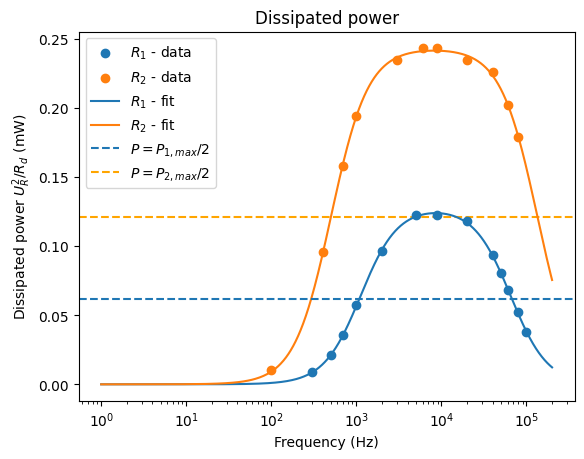

In [ ]:
plt.scatter(task1_100Ohm_freq, P1*1000, label = '$R_1$ - data')
plt.scatter(task1_1kOhm_freq, P2*1000, label = '$R_2$ - data')
plt.plot(freq_smooth_long, P1_fit*1000, label = '$R_1$ - fit')
plt.plot(freq_smooth_long, P2_fit*1000, label = '$R_2$ - fit')
#plt.axvline(f2_R1, ls = '--')
#plt.axvline(f1_R1, ls = '--')
plt.axhline(P1_max/2*1000, ls = '--', label = '$P = P_{1,max}/2$')
plt.axhline(P2_max/2*1000, ls = '--', c = 'orange', label = '$P = P_{2,max}/2$', zorder = -10)
#plt.axvline(f2_R2, ls = '--')
#plt.axvline(f1_R2, ls = '--')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Dissipated power $U_R^2/R_d$ (mW)')
plt.title('Dissipated power')
plt.legend()
plt.savefig('Task 1 - plot 2.png')